In [59]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt


### 第一部分：数据类型处理
- 数据加载
    - 字段含义：
        - user_id:用户ID
        - order_dt:购买日期
        - order_product:购买产品的数量
        - order_amount:购买金额
- 观察数据
    - 查看数据的数据类型
    - 数据中是否存储在缺失值
    - 将order_dt转换成时间类型
    - 查看数据的统计描述
        - 计算所有用户购买商品的平均数量
        - 计算所有用户购买商品的平均花费
    - 在源数据中添加一列表示月份

In [60]:
df = pd.read_csv('./data/CDNOW_master.txt',header=None,sep='\s+',names=['user_id','order_dt','order_product','order_amount'])
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [61]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [62]:
df['order_dt'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
df.head()

,user_id,order_dt,order_product,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [63]:
df.describe()

,user_id,order_product,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [64]:
#在源数据中添加一列表示月份
df['month'] = df['order_dt'].astype('datetime64[M]')

In [65]:
df.head()

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 第二部分：按月数据分析
- 用户每月花费的总金额
    - 绘制曲线图展示
- 所有用户每月的产品购买量
- 所有用户每月的消费总次数
- 统计每月的消费人数

In [66]:
#所有用户每月花费的总金额
month_amt_s = df.groupby(by='month')['order_amount'].sum()
month_amt_s

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

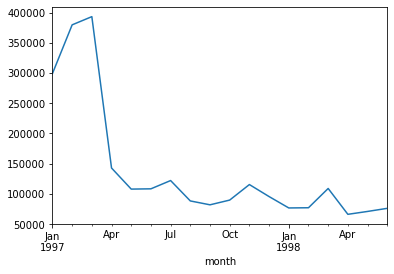

In [67]:
month_amt_s.plot()

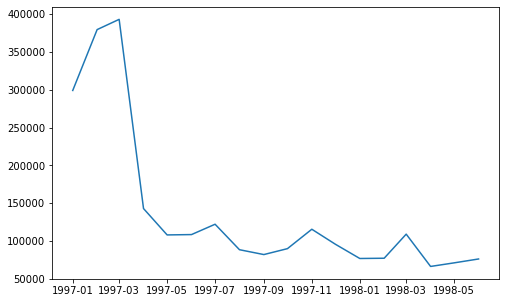

In [68]:
plt.figure(figsize=(8,5))
plt.plot(month_amt_s.index,month_amt_s.values)

In [69]:
#所有用户每月的产品购买量
df.groupby(by='month')['order_product'].sum()

month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: order_product, dtype: int64

In [70]:
#所有用户每月的消费总次数
df.groupby(by='month')['user_id'].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

In [37]:
#统计每月的消费人数【有人可能同一天消费多次】
df.groupby(by='month')['user_id'].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

### 第三部分：用户个体消费数据分析
- 用户消费总金额和消费总次数的统计描述
- 用户消费金额和消费次数的散点图
- 各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
- 各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)

In [71]:
#每一个用户消费总金额和消费总次数
df.groupby(by='user_id')['order_amount'].sum()
df.groupby(by='user_id')['order_amount'].count()

user_id
1         1
2         2
3         6
4         4
5        11
         ..
23566     1
23567     1
23568     3
23569     1
23570     2
Name: order_amount, Length: 23570, dtype: int64

Text(0, 0.5, 'sum_product')

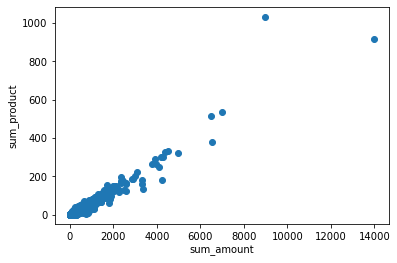

In [72]:
#绘制散点图
plt.scatter(df.groupby(by='user_id')['order_amount'].sum(),df.groupby(by='user_id')['order_product'].sum())
plt.xlabel('sum_amount')
plt.ylabel('sum_product')

In [73]:
#各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
user_amount_1000 = df.groupby(by='user_id').sum().query('order_amount <= 1000')['order_amount']
user_amount_1000

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
          ...  
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amount, Length: 23370, dtype: float64

(array([6.079e+03, 5.011e+03, 3.068e+03, 1.865e+03, 1.305e+03, 9.600e+02,
        7.970e+02, 5.910e+02, 5.150e+02, 3.710e+02, 3.460e+02, 2.740e+02,
        2.460e+02, 1.950e+02, 1.990e+02, 1.630e+02, 1.490e+02, 1.210e+02,
        1.350e+02, 9.600e+01, 8.700e+01, 8.800e+01, 6.300e+01, 6.000e+01,
        5.200e+01, 4.500e+01, 3.500e+01, 3.800e+01, 3.900e+01, 3.800e+01,
        2.900e+01, 2.200e+01, 3.800e+01, 3.100e+01, 2.000e+01, 1.600e+01,
        1.900e+01, 1.700e+01, 1.700e+01, 2.000e+01, 1.700e+01, 5.000e+00,
        1.600e+01, 1.100e+01, 1.300e+01, 1.300e+01, 9.000e+00, 1.100e+01,
        7.000e+00, 8.000e+00]),
 array([  0.    ,  19.9938,  39.9876,  59.9814,  79.9752,  99.969 ,
        119.9628, 139.9566, 159.9504, 179.9442, 199.938 , 219.9318,
        239.9256, 259.9194, 279.9132, 299.907 , 319.9008, 339.8946,
        359.8884, 379.8822, 399.876 , 419.8698, 439.8636, 459.8574,
        479.8512, 499.845 , 519.8388, 539.8326, 559.8264, 579.8202,
        599.814 , 619.8078, 639.8016

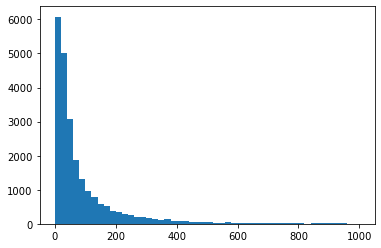

In [74]:
plt.hist(user_amount_1000,bins=50)

In [55]:
#各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)
user_product_100 = df.groupby(by='user_id').sum().query('order_product <= 100')['order_product']
user_product_100

user_id
1         1
2         6
3        16
4         7
5        29
         ..
23566     2
23567     1
23568     6
23569     2
23570     5
Name: order_product, Length: 23491, dtype: int64

(array([1.0742e+04, 4.1560e+03, 2.2870e+03, 1.4160e+03, 9.4200e+02,
        7.3000e+02, 5.4900e+02, 4.2600e+02, 3.3300e+02, 2.9200e+02,
        2.1700e+02, 1.9500e+02, 1.6600e+02, 1.4700e+02, 1.0500e+02,
        9.4000e+01, 3.6000e+01, 8.2000e+01, 6.4000e+01, 5.2000e+01,
        4.3000e+01, 3.6000e+01, 3.2000e+01, 4.0000e+01, 3.4000e+01,
        2.5000e+01, 3.0000e+01, 2.1000e+01, 1.9000e+01, 2.1000e+01,
        1.7000e+01, 9.0000e+00, 1.3000e+01, 6.0000e+00, 1.2000e+01,
        1.0000e+01, 9.0000e+00, 5.0000e+00, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 1.2000e+01, 7.0000e+00, 8.0000e+00, 6.0000e+00,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([ 1.  ,  2.94,  4.88,  6.82,  8.76, 10.7 , 12.64, 14.58, 16.52,
        18.46, 20.4 , 22.34, 24.28, 26.22, 28.16, 30.1 , 32.04, 33.98,
        35.92, 37.86, 39.8 , 41.74, 43.68, 45.62, 47.56, 49.5 , 51.44,
        53.38, 55.32, 57.26, 59.2 , 61.14, 63.08, 65.02, 66.96, 68.9 ,
        70.84, 72.78, 74.72, 76.66

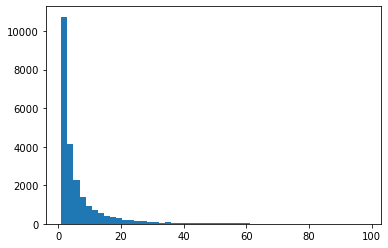

In [56]:
plt.hist(user_product_100,bins=50)

### 第四部分：用户消费行为分析
- 用户第一次消费的月份分布，和人数统计
    - 绘制线形图
- 用户最后一次消费的时间分布，和人数统计
    - 绘制线形图
- 新老客户的占比
    - 消费一次为新用户
    - 消费多次为老用户
        - 分析出每一个用户的第一个消费和最后一次消费的时间
            - agg(['func1','func2']):对分组后的结果进行指定聚合
        - 分析出新老客户的消费比例
- 用户分层
    - 分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
    - RFM模型设计
        - R表示客户最近一次交易时间的间隔。
            - /np.timedelta64(1,'D')：去除days
        - F表示客户购买商品的总数量,F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
        - M表示客户交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
        - 将R，F，M作用到rfm表中
    - 根据价值分层，将用户分为：
        - 重要价值客户
        - 重要保持客户
        - 重要挽留客户
        - 重要发展客户
        - 一般价值客户
        - 一般保持客户
        - 一般挽留客户
        - 一般发展客户
            - 使用已有的分层模型即可rfm_func

In [75]:
#用户第一次消费的月份分布，和人数统计
#分析：用户消费月份的最小值就是用户第一次消费的月份
df.groupby('user_id')['month'].min()

user_id
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-01-01
5       1997-01-01
           ...    
23566   1997-03-01
23567   1997-03-01
23568   1997-03-01
23569   1997-03-01
23570   1997-03-01
Name: month, Length: 23570, dtype: datetime64[ns]

In [58]:
#人数统计
df.groupby(by='user_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [76]:
#用户最后一次消费的时间分布，和人数统计
df.groupby(by='user_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [79]:
#新老客户的占比
#何为新用户：只消费了一次
#何为老用户：消费了多次
#如何计算用户的消费次数:可以找出用户第一次和最后一次消费时间，如果这两个时间一样，则表示该用户只消费了一次，否则表示用户消费了多次
#agg：可以将分组后的结果进行多种形式的聚合操作
df_min_max = df.groupby(by='user_id')['order_dt'].agg(['min','max'])
df_min_max
(df_min_max['min'] == df_min_max['max']).value_counts()

True     12054
False    11516
dtype: int64

In [80]:
#分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
#用户最近一次消费时间：用户消费时间的最大值
rfm = df.pivot_table(index='user_id',aggfunc={'order_product':'sum','order_amount':'sum','order_dt':'max'})
rfm.head()

,order_amount,order_dt,order_product
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [81]:
#R表示客户最近一次交易时间的间隔:最后一次交易时间和交易数据的最后一天的一个间隔
rfm['R'] =(rfm['order_dt'].max() - rfm['order_dt'])/np.timedelta64(1,'D')
rfm.columns = ['M','order_dt','F','R']
rfm = rfm[['R','F','M']]

In [82]:
rfm.head()

,R,F,M
user_id,,,
1,545.0,1,11.77
2,534.0,6,89.00
3,33.0,16,156.46
4,200.0,7,100.50
5,178.0,29,385.61


In [86]:
rfm.apply(lambda x : x - x.mean()).head()


,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [87]:
def rfm_func(x):
    #存储存储的是三个字符串形式的0或者1
    level = x.map(lambda x :'1' if x >= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result
#df.apply(func):可以对df中的行或者列进行某种（func）形式的运算
rfm['label'] = rfm.apply(lambda x : x - x.mean()).apply(rfm_func,axis = 1)
rfm.head()

,R,F,M,label
user_id,,,,
1,545.0,1,11.77,一般挽留客户
2,534.0,6,89.00,一般挽留客户
3,33.0,16,156.46,重要保持客户
4,200.0,7,100.50,一般发展客户
5,178.0,29,385.61,重要保持客户


#### 用户的生命周期
- 将用户划分为活跃用户和其他用户
    - 统计每个用户每个月的消费次数
    - 统计每个用户每个月是否消费，消费记录为1否则记录为0
    - 将用户按照每一个月份分成：
        - unreg:观望用户（前两月没买，第三个月才第一次买,则用户前两个月为观望用户）
        - unactive:首月购买后，后序月份没有购买则在没有购买的月份中该用户的为非活跃用户
        - new:当前月就进行首次购买的用户在当前月为新用户
        - active:连续月份购买的用户在这些月中为活跃用户
        - return:购买之后间隔n月再次购买的第一个月份为该月份的回头客

In [94]:
#统计每个用户每个月的消费次数
df_purchase = df.pivot_table(index='user_id',values='order_dt',aggfunc='count',columns='month',fill_value=0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,2,1,0,1,1,1,1,0,1,0,0,2,1,0,0,0,0,0


In [109]:
#统计每个用户每个月是否消费，消费记录为1否则记录为0
df_purchase = df_purchase.applymap(lambda x:1 if x >= 1 else 0)
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [98]:
#将df_purchase中的原始数据0和1修改为new，unactive......,返回新的df叫做df_purchase_new
#固定算法
def active_status(data):
    status = []#某个用户每一个月的活跃度
    for i in range(18):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
                    
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

pivoted_status = df_purchase.apply(active_status,axis = 1) 
pivoted_status.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [101]:
new_df = DataFrame(data=pivoted_status.values.tolist(),columns=df_purchase.columns,index=df_purchase.index)
new_df

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [105]:
new_df.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


- 每月【不同活跃】用户的计数
    - purchase_status_ct = df_purchase_new.apply(lambda x : pd.value_counts(x)).fillna(0)
    - 转置进行最终结果的查看


In [117]:
purchase_status_ct = new_df.apply(lambda x : pd.value_counts(x)).fillna(0)
purchase_status_ct

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,0.0,1157.0,1681.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
unreg,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
purchase_status_ct.T 

,active,new,return,unactive,unreg
month,,,,,
1997-01-01,0.0,7846.0,0.0,0.0,15724.0
1997-02-01,1157.0,8476.0,0.0,6689.0,7248.0
1997-03-01,1681.0,7248.0,595.0,14046.0,0.0
1997-04-01,1773.0,0.0,1049.0,20748.0,0.0
1997-05-01,852.0,0.0,1362.0,21356.0,0.0
1997-06-01,747.0,0.0,1592.0,21231.0,0.0
1997-07-01,746.0,0.0,1434.0,21390.0,0.0
1997-08-01,604.0,0.0,1168.0,21798.0,0.0
1997-09-01,528.0,0.0,1211.0,21831.0,0.0
